# Optimisation Coursework
## 2022-11-24

#### CID: 01868678

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Answer to Part I

#### (i)

Define continuous function $f$ as follow:

$$
f\left(y_1,y_2\right)=\left(y_1^2-y_2\right)^2
$$

This function is not coercive. Since for all $y_1^2 = y_2$, when ${||y||} \to\infty$, $\lim\limits_{{||y||} \to\infty}f\left(y\right) = 0$.

$$
\lim\limits_{{|x_1|} \to\infty} f\left(x_1, \alpha x_1\right) = \left(x_1^2-\alpha x_1\right)^2 = \left(x_1-\alpha \right)^2x_1^2
\\
\lim\limits_{{|x_2|} \to\infty} f\left(\alpha x_2,  x_2\right) = \left(\alpha ^2 x_2^2 - x_2\right)^2 = \left(\alpha ^2 x_2 - 1\right)^2x_2^2
$$

When ${|x_1|} \to\infty$, both $\left(x_1-\alpha \right)^2\to\infty$ and $x_1^2\to\infty$, so $\lim\limits_{{|x_1|} \to\infty} f\left(x_1, \alpha x_1\right) = \infty$. Similarly, when ${|x_2|} \to\infty$, both $\left(\alpha ^2 x_2 - 1 \right)^2\to\infty$ and $x_2^2\to\infty$, so $\lim\limits_{{|x_2|} \to\infty} f\left(\alpha x_2,  x_2\right) = \infty$. The conditions are satisfied.

#### (ii)

$$
f\left(x_1,x_2\right) = 4x_1^4+x_2^2-4x_1^2x_2+4 = \left(2x_1^2-x_2\right)^2+4 \ge 4
$$

The stationary points satisfy the following condition:
$$
\nabla f = 
\begin{pmatrix}
16x_1^3-8x_1x_2\\
2x_2-4x_1^2
\end{pmatrix}
=0
$$

Either $x_1 = x_2 = 0$ or $2x_1^2 = x_2$.

Check for the Hessian matrix:
$$
\nabla ^2 f = 
\begin{pmatrix}
48x_1^2-8x_2 & -8x_1\\
-8x_1 & 2
\end{pmatrix}
$$

When $x = \left(0,0\right)$, $\nabla ^2 f=
\begin{pmatrix}
0 & 0 \\
0 & 2
\end{pmatrix}$ which is positive semi-definite with eigenvalues 0 and 2. By checking $f\left(0,0\right) = 4$ and $\lim \limits_{||x|| \to \infty}f\left( x\right) \to \infty$, $f$ is coercive and stationary point $\left(0,0\right)$ is a global minimum.

When $x = \left(x_1, 2x_1^2\right)$, then $\nabla ^2 f=
\begin{pmatrix}
48x_1^2-16x_1^2 & -8x_1\\
-8x_1 & 2
\end{pmatrix}$. By checking $f\left(x_1, 2x_1^2\right) = 4$ and $\lim \limits_{||x|| \to \infty}f\left( x\right) \to \infty$, $f$ is coercive and stationary points $\left(x_1, 2x_1^2\right)$ is a global minimum.

### Answer to Part II

#### (i)

As $x_0=\bar x$ and $x_i = ax_{i-1} + du_i$, we can derive that
$$
x = Su-b
$$
where $S = 
\begin{pmatrix}
d & 0 & 0 & \cdots & 0\\
ad & d & 0 & \cdots & 0\\
a^2d & ad & d & \cdots & 0\\
\vdots & \vdots & \vdots &\ddots & \vdots \\
a^{N-1}d & a^{N-2}d & a^{N-3}d &\cdots & d
\end{pmatrix}
$ and $b = -
\begin{pmatrix}
ax_0\\
a^2x_0\\
\vdots\\
a^{N}x_0
\end{pmatrix}$.


So the regularised linear least squares problem for $u$ can be expressed as
$$
\textrm{min}_{u}||Su-b||_2^2+\frac{\gamma}{2}||u||_2^2
$$

By lecture notes, the optimal solution is 
$$
u^* = \left(S^TS+\frac{\gamma}{2}I^TI\right)^{-1}S^Tb
$$
where $I$ is the identity matrix.

To ensure $u^*$ exists, we need $S^TS+\frac{\gamma}{2}I^TI$ be invertible. By lecture notes 3, the condition $\textrm{Null}\left(S\right)\cap \textrm{Null}\left(I\right) = \{0\}$ is needed to assure $S^TS+\frac{\gamma}{2}I^TI$ to be invertible. 
\
$I$ is just identity matrix, so $\textrm{Null}\left(I\right) = \{0\}$. Therefore, we only need $\textrm{Null}\left(S\right) = \{0\}$. By the definition of $S$, $\textrm{Null}\left(S\right) = \{0\}$ as long as $d \neq 0$.

Since the inverse of matrix is unique, as long as $\left(S^TS+\frac{\gamma}{2}I^TI\right)^{-1}$ exists, the optimal solution $u^*$ is unique.

As $u^*$ is the optimal solution of $\text{min}||x||^2_2 + \frac{\gamma}{2}||u||^2_2$, we can derive 
$$
||Su^*-b||^2_2 + \frac{\gamma}{2}||u^*||^2_2 \leq ||Su'-b||^2_2 + \frac{\gamma}{2}||u'||^2_2
$$
for all $u'$.

Similarly as $u$ is the solves the unregularised linear least squares problems, we can derive 
$$
||Su-b||^2_2 \leq ||Su'-b||^2_2
$$
for all $u'$.

Therefore, 
$$
||Su^*-b||^2_2 + \frac{\gamma}{2}||u^*||^2_2 -||Su^*-b||^2_2 \leq ||Su-b||^2_2 + \frac{\gamma}{2}||u||^2_2 - ||Su-b||^2_2 \\
\frac{\gamma}{2}||u^*||^2_2 \leq \frac{\gamma}{2}||u||^2_2 \\
||u^*|| \leq ||u|| 
$$

#### (ii)

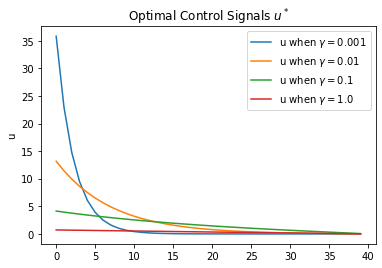

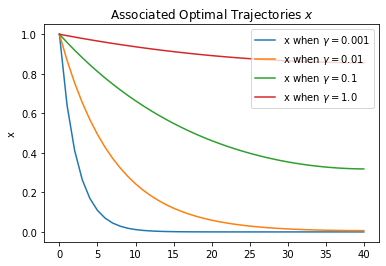

In [5]:
# define initial values
N = 40
a = 1
d = - 0.01
xbar = 1

# construct matrix S
S = np.zeros((N,N))
for i in range(N):
    for j in range(i+1):
        S[i,j] = (a**(i-j))*d

# construct array b
b = np.zeros(N)
for i in range(N):
    b[i] = - (a**(i+1))*xbar

# solving optimal control signals u
gamma = np.array([0.001, 0.01, 0.1, 1])

# Plot u from u_1 to u_N
for i in range(len(gamma)):
    u = np.linalg.inv(S.T@S+(gamma[i]/2)*np.identity(N))@S.T@b
    plt.plot(u, label='u when $\gamma = ${}'.format(gamma[i]))
plt.title("Optimal Control Signals $u^*$")
plt.ylabel("u")
plt.legend()
plt.show()

# Plot x from x_1 to x_N
for i in range(len(gamma)):
    u = np.linalg.inv(S.T@S+(gamma[i]/2)*np.identity(N))@S.T@b
    x = S@u - b
    x = np.insert(x, 0, xbar)
    plt.plot(x, label='x when $\gamma = ${}'.format(gamma[i]))
plt.title("Associated Optimal Trajectories $x$")
plt.ylabel("x")
plt.legend()
plt.show()

From the graph above, we can see that when $\gamma$ increases, the control signal $u^*$ has a lower initial value (for $i$ is small) and decays slower, and the optimal trajectory $x$ decays slower and has a higher value at $x_{40}$ (for $i$ is large).

#### (iii)

Use descent direction method with constant stepsize. The stepsize $t^k$ is set to be $t^k = \bar{t} = 0.1$. The descent direction $d^k$ is chosen to be minus the gradient $d^k = -\nabla f\left(u^k\right)$. Choose $u_0 = \begin{pmatrix}1 & 1 & \cdots & 1\end{pmatrix}$ to be the initial point and $\epsilon = 0.0001$ to be the tolerance parameter. By gradient method, $u^{k+1} = u^{k}+t^{k}d^{k}$. Stop the iteration until norm of gradient at $u^k$ are less than the tolerance parameter.

6.43844059655744


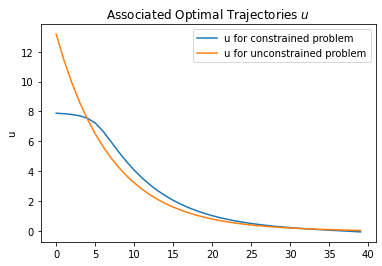

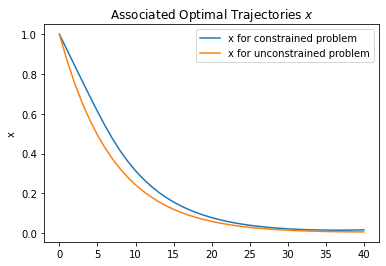

In [10]:
# define initial values
N = 40
a = 1
d = - 0.01
xbar = 1
umax = 8
gamma = 0.01
sigma = 0.01
    
# define the function to be minimised
def f(S, b, u):
    sol = np.linalg.norm(S@u - b)**2 + gamma*(np.linalg.norm(u)**2)/2
    for i in range(N):
        sol = sol - sigma*np.log(umax-u[i])
    return sol

# define the gradient
def grad(S, b, u):
    sol = 2*S.T@S@u - 2*S.T@b + np.multiply(gamma,u)
    for i in range(N):
        sol[i] += sigma*(1/(umax - u[i]))
    return sol

# gradient method with constant stepsize
def gradient_method_constant(u0, t, epsilon):
    u = u0
    g = grad(S, b, u)
    while np.linalg.norm(g) > epsilon:
        u = u - t*g
        fun_val = f(S, b, u)
        g = grad(S, b, u)
    x = S@u - b
    x = np.insert(x, 0, xbar)
    return u, x, fun_val

u0, x0, fun_val0 = gradient_method_constant(u0=np.ones(40), t=0.5, epsilon=0.0001)
print(fun_val0)

# Unconstrained problem
u = np.linalg.inv(S.T@S+(gamma/2)*np.identity(N))@S.T@b
x = S@u - b
x = np.insert(x, 0, xbar)

# Plot u from u_1 to u_N
plt.plot(u0, label='u for constrained problem')
plt.plot(u, label='u for unconstrained problem')
plt.title("Associated Optimal Trajectories $u$")
plt.ylabel("u")
plt.legend()
plt.show()

# Plot x from x_1 to x_N
plt.plot(x0, label='x for constrained problem')
plt.plot(x, label='x for unconstrained problem')
plt.title("Associated Optimal Trajectories $x$")
plt.ylabel("x")
plt.legend()
plt.show()

From the graph we can see that the upper bound of $u$ is 8 at the beginning for the constrained problem, and the value of $u$ decreases at a slower speed at first. But for large $i$, $u_i$ decrease to similar values for both circumstance.\
For the constrained problem, and the value of $x$ decreases at a slower speed at first. But for large $i$, $x_i$ decrease to similar values for both circumstance.

This is because for small $i$, $u_i$ for constrained problem is restricted by an upper bound 8. When $i$ increases, $u_i$ gets smaller and the effect of upper bound vanishes. So for both situations, we end up similar $u_i$, $x_i$ for large $i$.

#### (iv)

The regulariser $\mathcal{L}(u)$ satisfies $\mathcal{L}(u) \leq \frac{\epsilon ^2}{2}$ when $|u_i|\leq \epsilon$ and $\mathcal{L}(u) > \frac{\epsilon ^2}{2}$ when $|u_i|> \epsilon$. The value of $\mathcal{L}(u)$ is larger if $|u_i|$ is larger and is smaller if $|u_i|$ is smaller. So it acts like a penalty term in the function in order to let $|u_i|$ be as small as possible while minimising the whole function. Therefore the term $\mathcal{L}(u)$ promote sparsity in the control signal $u$.

$\mathcal{L}$ is differentiable with derivative:
$$
\frac{\partial \mathcal{L}}{\partial u_i}=
\left \{
\begin{array}{lr}
u_i &  |u_i|\leq \epsilon \\
\epsilon &  u_i > \epsilon \\
-\epsilon &  u_i < -\epsilon
\end{array}
\right.
$$
when $|u_i| = \epsilon$, the derivative is continuous as $\frac{\partial \mathcal{L}}{\partial u_i}=u_i = \epsilon$ when $u_i = \epsilon$ and $\frac{\partial \mathcal{L}}{\partial u_i}=u_i = -\epsilon$ when $u_i = -\epsilon$.

We use descent direction method with backtracking stepsize. Start with initial stepsize $t^k$ is set to be $t^k = s = 1$. The descent direction $d^k$ is chosen to be minus the gradient $d^k = -\nabla f\left(u^k\right)$. Choose $u_0 = \begin{pmatrix}1 & 1 & \cdots & 1\end{pmatrix}$ to be the initial point and $\epsilon = 0.01$ to be the tolerance parameter. Choose two parameters $\alpha =0.5$ and $\beta = 0.5$. While $f(u) - f(u - tg) < \alpha t ||g||^2$, where $g$ is the gradient, set $t = \beta t$. By gradient method, $u^{k+1} = u^{k}+t^{k}d^{k}$. Stop the iteration until the norm of gradient at $u^k$ are less than the tolerance parameter.

6.592338289162596
2.8513735802628646


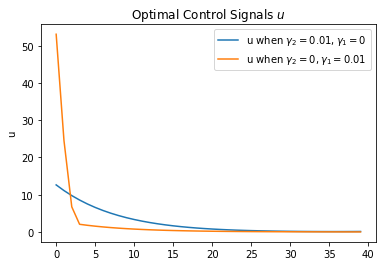

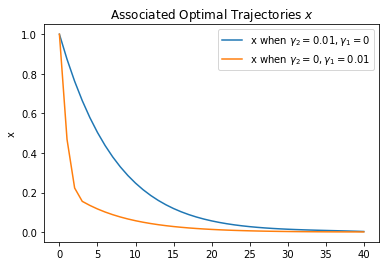

In [7]:
# define initial values
N = 40
a = 1
d = - 0.01
xbar = 1
eps = 3

# construct matrix S
S = np.zeros((N,N))
for i in range(N):
    for j in range(i+1):
        S[i,j] = (a**(i-j))*d

# construct array b
b = np.zeros(N)
for i in range(N):
    b[i] = - (a**(i+1))*xbar

# define function curly L
def L(u):
    sol = []
    for i in range(len(u)):
        if abs(u[i]) <= eps:
            ui = ((u[i])**2)/2
            sol.append(ui)
        else:
            ui = eps*(abs(u[i])-(eps/2))
            sol.append(ui)
    return sol

# define the function to be minimised
def f(gamma2, gamma1, u):
    sol = np.linalg.norm(S@u - b)**2 + gamma2*(np.linalg.norm(u)**2)/2 + gamma1*np.sum(L(u))
    return sol

# define the gradient of sum of L
def gL(u):
    sol = []
    for i in range(len(u)):
        if abs(u[i]) <= eps:
            ui = u[i]
        else:
            ui = np.sign(u[i])*eps
        sol.append(ui)
    return sol

# define the gradient
def grad(gamma2, gamma1, u):
    sol = 2*S.T@S@u - 2*S.T@b + np.multiply(gamma2,u) + np.multiply(gamma1,gL(u))
    return sol

# gradient method with backtracking stepsize
def gradient_method_backtrack(gamma2, gamma1, u0, s, alpha, beta, epsilon):
    u = u0
    g = grad(gamma2, gamma1, u)
    fun_val = f(gamma2, gamma1, u)
    while np.linalg.norm(g) > epsilon:
        t = s
        while fun_val - f(gamma2, gamma1, u-t*g) < alpha*t*np.linalg.norm(g)**2:
            t = beta*t
        u = u - t*g
        fun_val = f(gamma2, gamma1, u)
        g = grad(gamma2, gamma1, u)
    x = S@u - b
    x = np.insert(x, 0, xbar)
    return u, x, fun_val

u1, x1, fun_val1 = gradient_method_backtrack(gamma2=0.01, gamma1=0, u0=np.ones(40), s=1, alpha=0.5, beta=0.5, epsilon=0.01)
u2, x2, fun_val2 = gradient_method_backtrack(gamma2=0, gamma1=0.01, u0=np.ones(40), s=1, alpha=0.5, beta=0.5, epsilon=0.01)
print(fun_val1)
print(fun_val2)

# Plot u from u_1 to u_N
plt.plot(u1, label='u when $\gamma_2=0.01, \gamma_1=0$')
plt.plot(u2, label='u when $\gamma_2=0, \gamma_1=0.01$')
plt.title("Optimal Control Signals $u$")
plt.ylabel("u")
plt.legend()
plt.show()

# Plot x from x_1 to x_N
plt.plot(x1, label='x when $\gamma_2=0.01, \gamma_1=0$')
plt.plot(x2, label='x when $\gamma_2=0, \gamma_1=0.01$')
plt.title("Associated Optimal Trajectories $x$")
plt.ylabel("x")
plt.legend()
plt.show()

By comparing the two cases, we can see that for large $i$, $u_i$ and $x_i$ decreases to similar values in both situations. When $\gamma_1 = 0$, the optimal solution is the same as regularised unconstrained case, $x_i$ and $u_i$ decrease in a slower speed. When $\gamma_2 = 0$, $x_i$ and $u_i$ decrease in a faster speed for small $i$ and slower than when $\gamma_1 = 0$ for larger $i$ (for $i \ge 5$ to be specific).

And the optimal value of function when $\gamma_2 = 0$ is smaller than when $\gamma_1 = 0$,